# OTF Generation template

This is a template presumably received from David Hoffman.

It is used to generate a radially averaged OTF from a bead (PSF)


### Set up path to additional utility code

In [2]:
import sys
computer = 'bnort'

if computer == 'default':
    sys.path.insert(1, 'Y:\Cryo_data2\Data Processing Notebooks')
    sys.path.insert(1, 'Y:\Cryo_data2\Data Processing Notebooks\Scripts')
elif computer == 'bnort':
    sys.path.insert(1, r'C:\Users\bnort\work\Janelia\code\\simrecon\scripts\Scripts')
    sys.path.insert(1, r'C:\Users\bnort\work\Janelia\code\\simrecon\scripts')
else:
    pass

In [3]:
%pylab inline
import mrc
# from skimage.external import tifffile as tif
import tqdm
import os
import glob
# %load_ext autoreload
# %autoreload 2
# from simrecon_utils import PSF3DProcessor, remove_bg, center_data
# # from pyDecon.decon import richardson_lucy
import re
from dphplotting import display_grid, recolor, make_grid, clean_grid
from shutil import copyfile
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Setup path to OTFs

Note:  Seems like the OTF path needs to be on the same drive as the code is running on, the command to switch drives doesn't seem to work (need to look into this)

In [4]:
#home = r'Y:\Cryo_data2\ORCA_data\20240430 - LID 740 etc\AR Cells\beads\AR-coated bead 1c 0.3W 25ms no 532 on_20240508_112619'
home = r'C:\Users\bnort\work\Janelia\otfs'

In [5]:
re_nm = re.compile("\d+(?= nm)")
print(re_nm)

re.compile('\\d+(?= nm)')


## Confirm that the radialft executable exists

In [6]:
#!C:/SIMrecon_svn/radialft -h
!C:/Users/bnort/work/Janelia/code/simrecon/build/radialft -h
#!C:/Users/bnort/work/Janelia/code/janeliaversion_tests/scripts/SIMrecon_svn/radialft -h

Parse command line
Usage:
radialft [[input file] [output file]] [Options]

Options:
	-nphases -- number of phases; default 5
	-beaddiam F -- the diameter of the bead in microns (default is 0.12)
	-angle F -- the k0 vector angle with which the PSF is taken (default is 0)
	-ls x -- the illumination pattern's line spacing (in microns, default is 0.2)
	-nocompen -- do not perform bead size compensation (default is to perform)
	-5bands -- to output 5 OTF bands (default is combining higher-order's real and imag bands into one output
	-fixorigin kr1 kr2 -- the starting and end pixel for interpolation along kr axis (default is 2 and 9)
	-na x -- the (effective) NA of the objective
	-nimm x -- the index of refraction of the immersion liquid
	-leavekz kz1_1 kz1_2 kz2 -- the pixels to be retained on kz axis
	-I2M I2m_otf_file_name -- data contains I2M PSF and supply the I2M otf file name
	-background bkgd_value -- use the supplied number as the background to subtract
	-help or -h -- print this me

## Define process_otf function

This uses a shell command to run the radialft executable


In [7]:
import os

def process_otf(path, ks=None, exp=''):
    
    wl = re_nm.findall(tail)[0]
    print(wl)
    print(path)
    wl_um = int(wl) / 1000
    path2 = '{}nmLinOTF{}{}.mrc'.format(wl, i, exp)
    
    if ks is None:
        extra = ''
    else:
        extra = '-leavekz {} {} {}'.format(*ks)
    print(extra)

    test1 =  os.path.splitdrive(head)[0]
    test2 =   '"' + tail + '"'
    test3 =   '"' + path2 + '"'
    
    msg = !{os.path.splitdrive(head)[0]} & cd & cd {head} & cd & C:/Users/bnort/work/Janelia/code/simrecon/build/radialft {'"' + tail + '"'} {'"' + path2 + '"'} -angle 0.203\
     -ls {wl_um/2/0.81} -beaddiam 0.2 -na 0.82 -nimm 1.0 -fixorigin 3 5 -ifixkr 16 -background 130 {extra}

    #msg = !{os.path.splitdrive(head)[0]} & cd & cd {head} & cd & C:/Users/bnort/work/Janelia/code/janeliaversion_tests/scripts/SIMrecon_svn/radialft {'"' + tail + '"'} {'"' + path2 + '"'} -angle 0.203\
    # -ls {wl_um/2/0.81} -beaddiam 0.2 -na 0.82 -nimm 1.0 -fixorigin 3 5 -ifixkr 16 -background 130 {extra}
    
    print(head)
    OTF_Folder = r'computed_OTF_folder'
    print(OTF_Folder)
    OTF_path = os.path.join(home,OTF_Folder)
    print(OTF_path)
    OTF_Path_file = os.path.join(OTF_path,path2)
    print(OTF_Path_file)
    OTF_file = os.path.join(head, path2)
    print(OTF_file)
    
    if not os.path.exists(OTF_path):
        print("Creating Folder for You.")
        os.makedirs(OTF_path)
    
    copyfile(os.path.join(head, path2), OTF_Path_file)
    os.remove(os.path.join(head, path2))
    return OTF_Path_file

## Crop the bead image

cropped_MRC
C:\Users\bnort\work\Janelia\otfs\cropped_MRC
C:\Users\bnort\work\Janelia\otfs\cropped_MRC\488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0_crop.mrc
copped file:: C:488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0_crop.mrc
C:\Users\bnort\work\Janelia\otfs\488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0.mrc
(325, 256, 256)
(325, 160, 160)


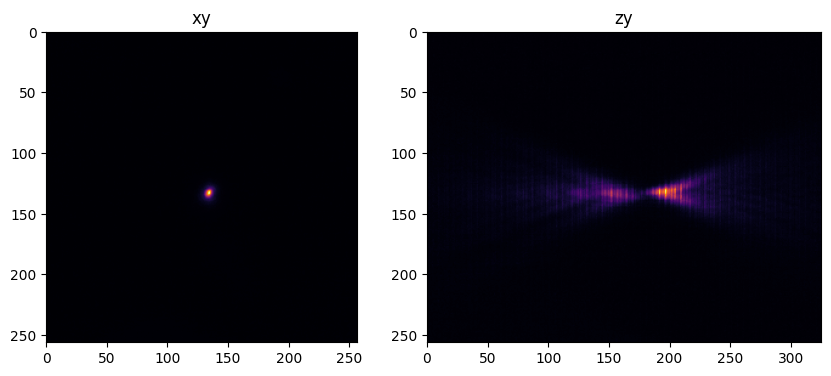

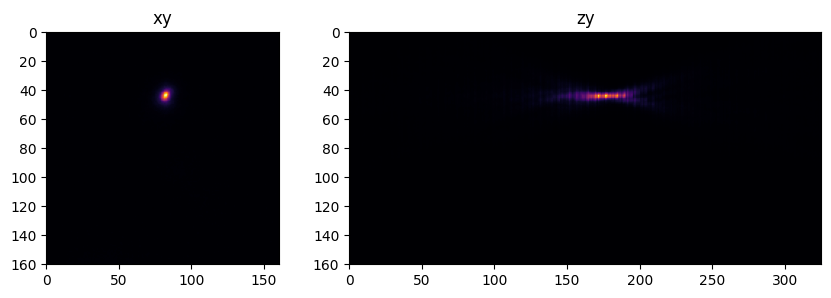

In [9]:
# Crop wrong sized PSF:

for path in sorted(glob.iglob(home + "/*_0*.mrc", recursive=True)):
    
    path2 = r'488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0_crop.mrc'
    head = os.path.splitdrive(path)[0]
    
    crop_Folder = r'cropped_MRC'
    print(crop_Folder)
    crop_path = os.path.join(home,crop_Folder)
    print(crop_path)
    crop_Path_file = os.path.join(crop_path,path2)
    print(crop_Path_file)
    crop_file = os.path.join(head, path2)
    print('copped file::',crop_file)
    
    if not os.path.exists(crop_path):
        print("Creating Folder for You.")
        os.makedirs(crop_path)

     
    path = path
    print(path)
    

    mymrc = mrc.Mrc(path)
    otf = array(mymrc.data)
    nz, ny, nx = otf.shape
    print(otf.shape)
    mag = abs(otf)
    mask = mag > 0

    from tnia.plotting.projections import show_xy_zy_slice_center 

    fig = show_xy_zy_slice_center(otf, colormap='inferno', figsize=(10, 10))
    
    '''
    fig, axs = make_grid(nz * 2, 2, figsize=2, grid_aspect=ny / nx)
    for ax, otf_data in zip(axs[0], angle(otf) * mask):
        ax.matshow(otf_data, cmap="seismic", vmin=-pi, vmax=pi)

    for ax, otf_data in zip(axs[1], log(mag)):
        ax.matshow(otf_data, cmap="inferno")

    for ax in axs.ravel():
        ax.grid("off")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.patch.set_visible(False)
        for s in ax.spines.values():
            s.set_visible(True)
            s.set_color("k")
    '''
    # USER INPUT ! ! ! ! 
    rectangle_x_left_co_ordinate = 52  # USER Input this value using FIJI rectangle specify to set X value
    rectangle_Y_TOP_co_ordinate = 89   # USER Input this value using FIJI rectangle specify to set Y value
    #rectangle_Y_TOP_co_ordinate = 95 -  rectangle_Y_TOP_co_ordinate  # PYTHON ROI OFFSET, DON'T EDIT!
     
    
    width = rectangle_x_left_co_ordinate  + 160
    height = rectangle_Y_TOP_co_ordinate + 160
    otf = array(mymrc.data)[:,rectangle_Y_TOP_co_ordinate:height,rectangle_x_left_co_ordinate:width]
    nz, ny, nx = otf.shape
    print(otf.shape)
    mag = abs(otf)
    mask = mag > 0
    
    
    
    '''
    fig, axs = make_grid(nz * 2, 2, figsize=2, grid_aspect=ny / nx)
    for ax, otf_data in zip(axs[0], angle(otf) * mask):
        ax.matshow(otf_data, cmap="seismic", vmin=-pi, vmax=pi)

    for ax, otf_data in zip(axs[1], log(mag)):
        ax.matshow(otf_data, cmap="inferno")

    for ax in axs.ravel():
        ax.grid("off")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.patch.set_visible(False)
        for s in ax.spines.values():
            s.set_visible(True)
            s.set_color("k")
    
    fig.suptitle(os.path.split(path)[-1], y=1.01, fontweight="bold")
    fig.tight_layout()
    '''   
    fig = show_xy_zy_slice_center(otf, colormap='inferno', figsize=(10, 10)) 
    crop_save = os.path.join(crop_path, r'488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0_crop.mrc')
    mrc.save(otf, crop_save, hdr=mymrc.hdr,ifExists='overwrite')
    #mymrc.close()
    del mymrc
    

## List the beads that have been cropped

In [10]:
for i, path in enumerate(tqdm.tqdm_notebook(sorted(glob.iglob(home + r"/cropped_MRC/*_crop*.mrc")))):
    print(path)

C:\Users\bnort\work\Janelia\otfs/cropped_MRC\488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0_crop.mrc



## Generate OTFs

For each bead generate an OTF

In [11]:
for i, path in enumerate(tqdm.tqdm_notebook(sorted(glob.iglob(home + r"/cropped_MRC/*_crop*.mrc")))):
    
    head, tail = os.path.split(os.path.abspath(path))
    print(head)
    print(tail)
#     if os.path.exists(head + ".mrc"):
#         continue
    process_otf(path)

C:\Users\bnort\work\Janelia\otfs\cropped_MRC
488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0_crop.mrc
488
C:\Users\bnort\work\Janelia\otfs/cropped_MRC\488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0_crop.mrc

C:\Users\bnort\work\Janelia\otfs\cropped_MRC
computed_OTF_folder
C:\Users\bnort\work\Janelia\otfs\computed_OTF_folder
C:\Users\bnort\work\Janelia\otfs\computed_OTF_folder\488nmLinOTF0.mrc
C:\Users\bnort\work\Janelia\otfs\cropped_MRC\488nmLinOTF0.mrc
Creating Folder for You.



In [12]:
sns.set_style("white")
sns.set_context("notebook")

## Define display otf

In [13]:
def display_otf(path):
    mymrc = mrc.Mrc(path)
    otf = array(mymrc.data)
    nz, ny, nx = otf.shape
    mag = abs(otf)
    mask = mag > 0
    fig, axs = make_grid(nz * 2, 2, figsize=2, grid_aspect=ny / nx)
    for ax, otf_data in zip(axs[0], angle(otf) * mask):
        ax.matshow(otf_data, cmap="seismic", vmin=-pi, vmax=pi)

    for ax, otf_data in zip(axs[1], log(mag)):
        ax.matshow(otf_data, cmap="inferno")

    for ax in axs.ravel():
        ax.grid("off")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.patch.set_visible(False)
        for s in ax.spines.values():
            s.set_visible(True)
            s.set_color("k")
    
    fig.suptitle(os.path.split(path)[-1], y=1.01, fontweight="bold")
    fig.tight_layout()

    #mymrc.close()
    del mymrc
    

## Display all OTFs 

C:\Users\bnort\work\Janelia\otfs\computed_OTF_folder\488nmLinOTF0.mrc


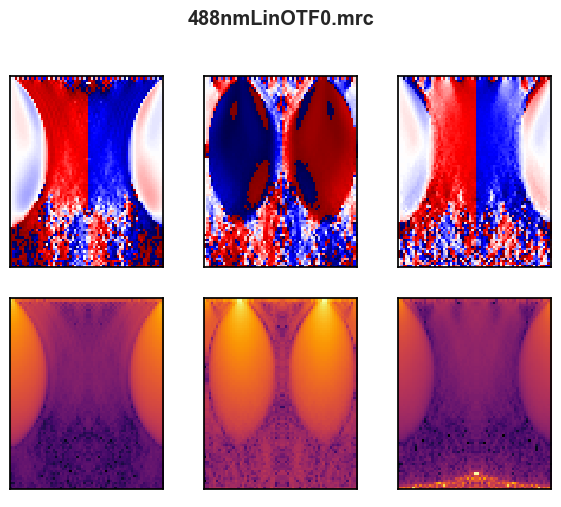

In [14]:
for path in sorted(glob.iglob(os.path.join(home, r'computed_OTF_folder') + "/*.mrc", recursive=True)):
    print(path)
    display_otf(path)

## Generate masked OTFs

This cell regenerates an OTF but uses the kz parameter to mask the OTF

C:\Users\bnort\work\Janelia\otfs/cropped_MRC\488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0_crop.mrc
488
C:\Users\bnort\work\Janelia\otfs/cropped_MRC\488 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0_crop.mrc
-leavekz 14 16 2
C:\Users\bnort\work\Janelia\otfs\cropped_MRC
computed_OTF_folder
C:\Users\bnort\work\Janelia\otfs\computed_OTF_folder
C:\Users\bnort\work\Janelia\otfs\computed_OTF_folder\488nmLinOTF0_mask2.mrc
C:\Users\bnort\work\Janelia\otfs\cropped_MRC\488nmLinOTF0_mask2.mrc


c:\Users\bnort\miniconda3\envs\simrecon_python_373\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


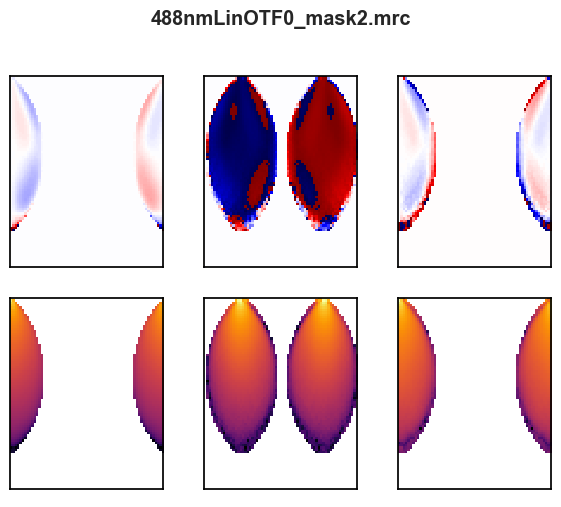

In [21]:

for i, path in enumerate(tqdm.tqdm_notebook(sorted(glob.iglob(home + "/cropped_MRC/*_crop*.mrc")))):
    
    print(path)
#    
    #display_otf(process_otf(path, exp='_nomask'))
    #display_otf(process_otf(path, (14, 16, 2), '_mask'))
    display_otf(process_otf(path, (14,16,2), '_mask2'))
    #display_otf(process_otf(path, (8, 22, 0)))
    #test=display_otf(process_otf(path))

## Further masking of OTF

Below code is used to experiment with additional masking of OTF

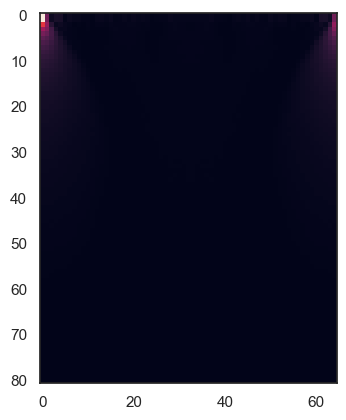

In [24]:
import mrc as Mrc

temp = Mrc.Mrc('C:\\Users\\bnort\\work\\Janelia\\ims\\computed_OTF_folder\\488nmLinOTF0_nomask.mrc')
otf_data = temp.data.copy()
#print(otf_data.dtype)
#print(otf.data.dtype)
otf_data[2,62:,:]=0+0j
#otf_abs = abs(otf_data)
#plt.imshow(otf_abs[2,:,:])
otf_data = otf_data.astype('complex64')
mrc.save(otf_data, 'C:\\Users\\bnort\\work\\Janelia\\ims\\computed_OTF_folder\\488nmLinOTF0_nomask2.mrc', hdr=temp.hdr, ifExists='overwrite')
#print(test)
#test2= mrc.Mrc('C:\\Users\\bnort\\work\\Janelia\\ims\\computed_OTF_folder\\488nmLin324OTF0.mrc')
#test2.data.dtype
otf_abs = abs(otf_data)
plt.imshow(otf_abs[2,:,:])

In [42]:
for i in range(otf_data.shape[0]):
    abs_otf = abs(otf_data[i,:,:])
    print(abs_otf.sum())

18.208364
2.9677613
3.560532


## Legacy code for masking other wavelengths

Below code appears to be legacy code for masking other wavelengths.  Keeping it in, in case it is useful for future reference

F:ORCA_Data/20190920_(New Beads and OTFs)/Test OTFs/532 OTF Bead 3_20190920_154920/532 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0.mrc


C:\Users\Dan\Miniconda3\envs\sandbox\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


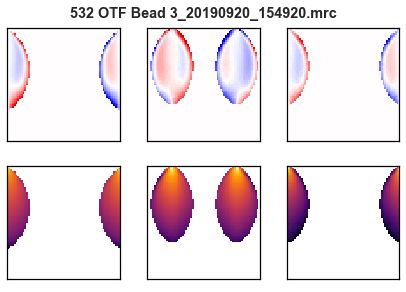

In [51]:
path = otf_home + '532 OTF Bead 3_20190920_154920/532 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0.mrc'
head, tail = os.path.split(os.path.abspath(path))
print(path)
display_otf(process_otf(path, (12, 15, 2)))

F:ORCA_Data/20190920_(New Beads and OTFs)/Test OTFs/561 OTF Bead 3_20190920_154442/560 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0.mrc


C:\Users\Dan\Miniconda3\envs\sandbox\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


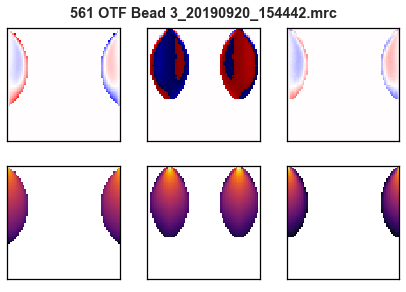

In [62]:
path = otf_home + '561 OTF Bead 3_20190920_154442/560 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0.mrc'
head, tail = os.path.split(os.path.abspath(path))
print(path)
display_otf(process_otf(path, (11, 13, 2)))

F:ORCA_Data/20190920_(New Beads and OTFs)/Test OTFs/642 OTF Bead 2_20190920_160621/642 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0.mrc


C:\Users\Dan\Miniconda3\envs\sandbox\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


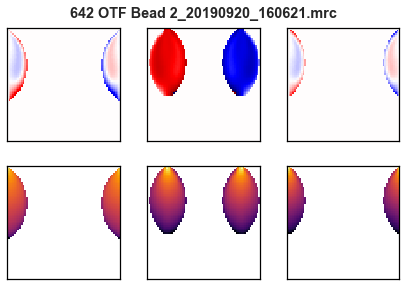

In [63]:
path = otf_home + '642 OTF Bead 2_20190920_160621/642 nm 5 phases 0.81 NA Single Orientation Linear SIM_cam1_0.mrc'
head, tail = os.path.split(os.path.abspath(path))
print(path)
display_otf(process_otf(path, (10, 12, 1)))